# About Dataset
## Context

#### Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

## Content

This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

This column is marked 'Yes' if the rain for that day was 1mm or more.

## Data Description

* Date - The date of observation
* Location - The common name of the location of the weather station
* MinTemp - The minimum temperature in degrees celsius
* MaxTemp - The maximum temperature in degrees celsius
* Rainfall - Rainfall during a particular day. (millimeters)
* Evaporation - Evaporation during a particular day. (millimeters)
* Sunshine - Bright sunshine during a particular day. (hours)
* WindGusDir - The direction of the strongest gust during a particular day. (16 compass points)
* WindGuSpeed - Speed of strongest gust during a particular day. (kilometers per hour)
* WindDir9am - The direction of the wind for 10 min prior to 9 am. (compass points)
* WindDir3pm - The direction of the wind for 10 min prior to 3 pm. (compass points)
* WindSpeed9am - Speed of the wind for 10 min prior to 9 am. (kilometers per hour)
* WindSpeed3pm - Speed of the wind for 10 min prior to 3 pm. (kilometers per hour)
* Humidity9am - The humidity of the wind at 9 am. (percent)
* Humidity3pm - The humidity of the wind at 3 pm. (percent)
* Pressure9am - Atmospheric pressure at 9 am. (hectopascals)
* Pressure3pm - Atmospheric pressure at 3 pm. (hectopascals)
* Cloud9am - Cloud-obscured portions of the sky at 9 am. (eighths)
* Cloud3pm - Cloud-obscured portions of the sky at 3 pm. (eighths)
* Temp9am - The temperature at 9 am. (degree Celsius)
* Temp3pm - The temperature at 3 pm. (degree Celsius)
* RainToday - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.
* RainTomorrow - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

#### Source & Acknowledgements

The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.
For example, you can check the latest weather observations in Canberra here: Canberra Weather.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
#read the dataset
df = pd.read_csv('weatherAUS.csv')

In [47]:
#Let view the first 5 rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [48]:
# General infomation on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are 23 columns in the dataset, 17 columns are numeric data while 6 of them are non-numeric

In [49]:
#extract the numeric and non-numeric dataset
numeric_df = df.select_dtypes(exclude='object')
non_numeric_df = df.select_dtypes(include='object')

In [50]:
numeric_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [51]:
for col in non_numeric_df.columns:
    print(f'Column name: {col}')
    print(non_numeric_df[col].value_counts().sort_values(ascending=False))
    print("*" * 30)

Column name: Date
2013-11-12    49
2016-12-13    49
2017-01-03    49
2017-01-02    49
2017-01-01    49
              ..
2008-01-28     1
2008-01-29     1
2008-01-30     1
2007-12-17     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64
******************************
Column name: Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Launceston          3040
Wollongong          3040
MountGinini         3040
Albury              3040
AliceSprings        3040
Bendigo             3040
Cairns              3040
Townsville          3040
Ballarat            3040
MountGambier        3040
GoldCoast           3040
Albany              3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
WaggaWagga          3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
Portland            3009
Wil

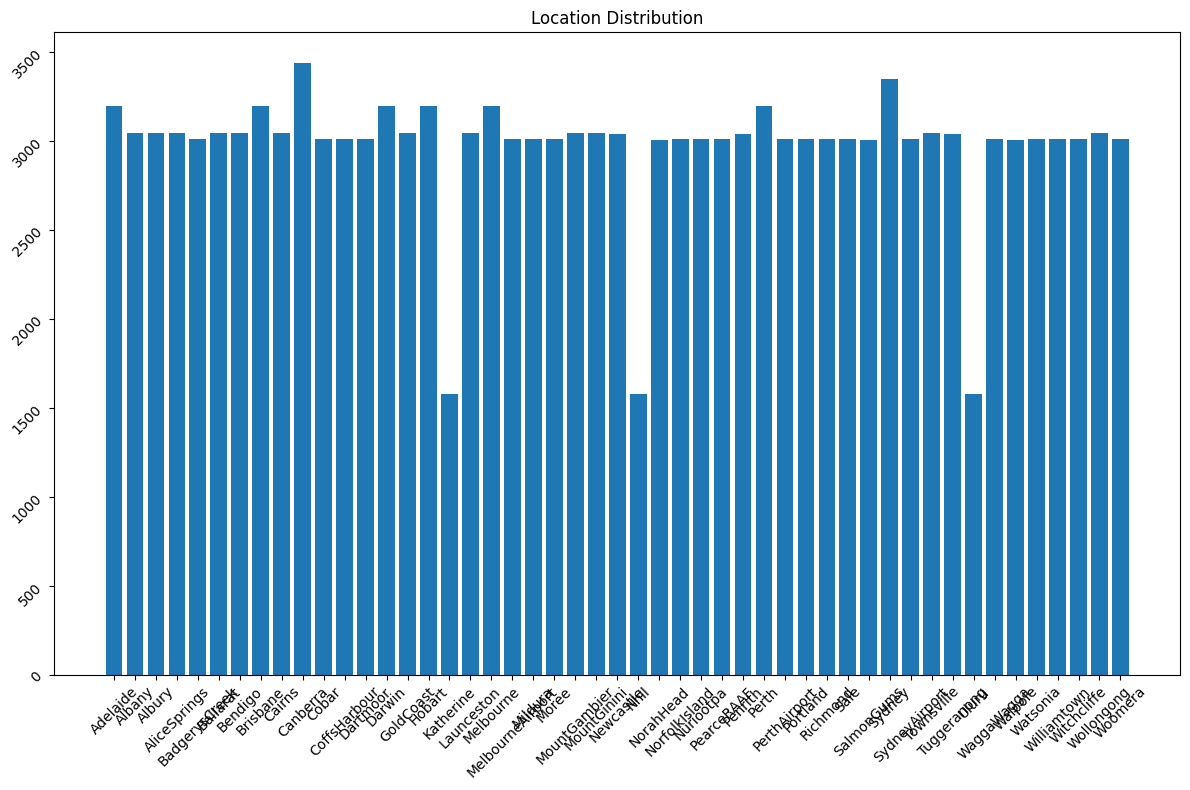

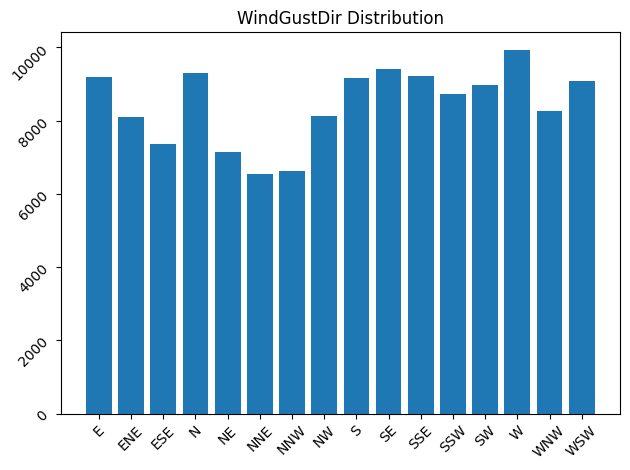

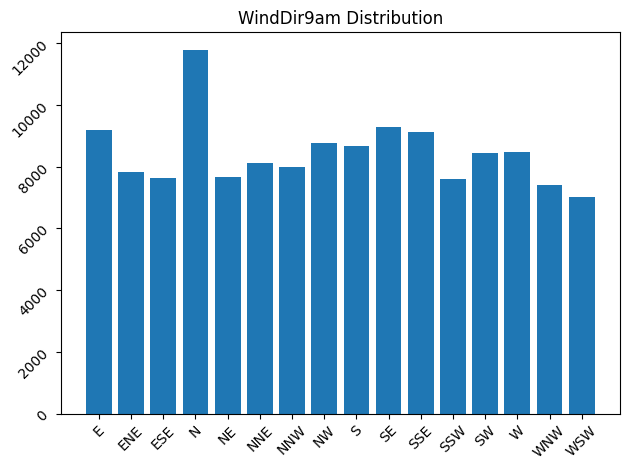

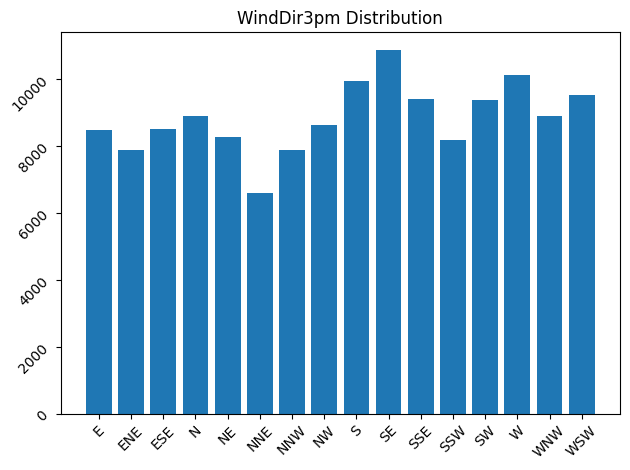

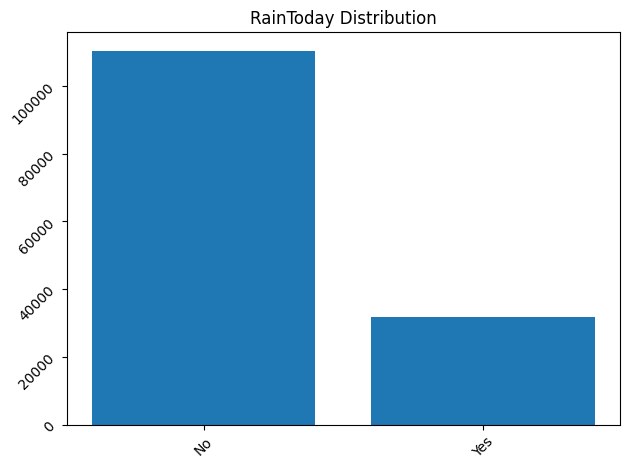

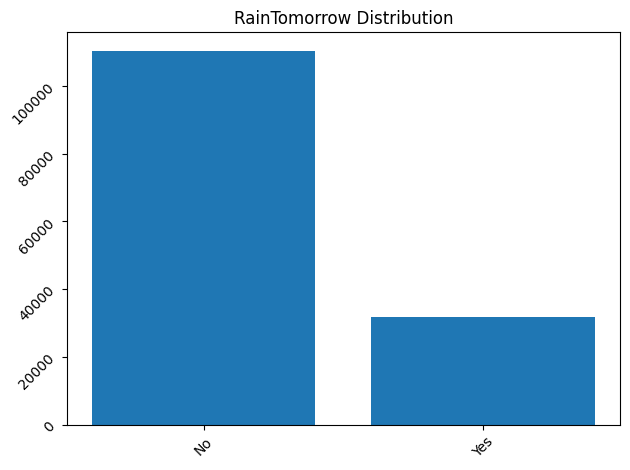

In [52]:
#Plot the distribution of non-numeric data except "Date" 
non_numeric_column_to_plot = [col for col in non_numeric_df.columns if col not in ['Date']]

plt.figure(figsize=(12, 8))

# Loop through each non-numeric column and plot its distribution
for col in non_numeric_column_to_plot:
    val_freq = non_numeric_df[col].value_counts().sort_index()
    plt.bar(val_freq.index, val_freq.values)
    plt.tick_params(labelrotation=45)
    plt.title(f'{col} Distribution')
    plt.tight_layout()  # Adjust subplot parameters for better layout
    plt.show()  # Display each plot separately

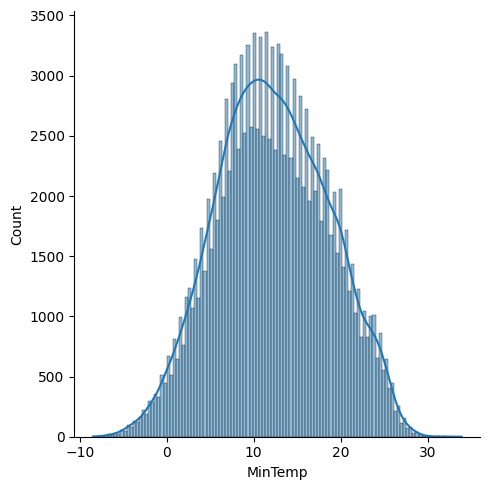

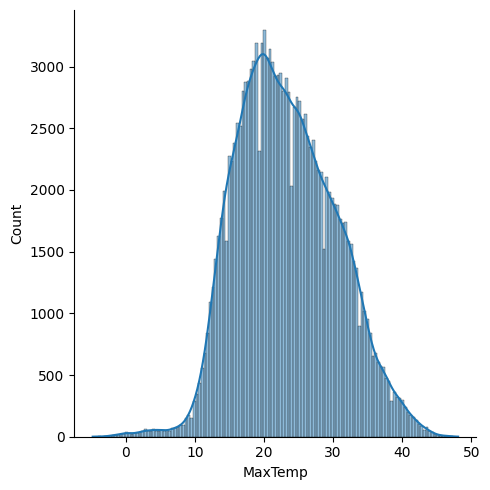

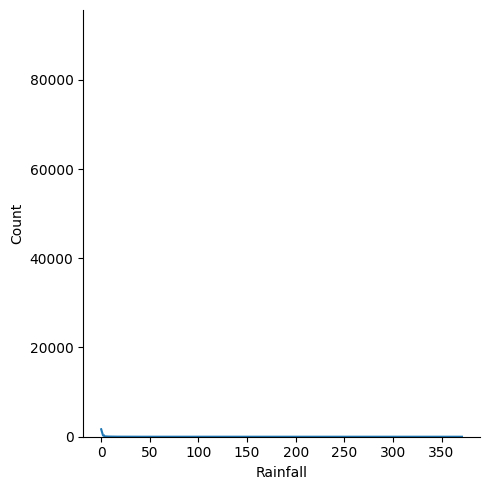

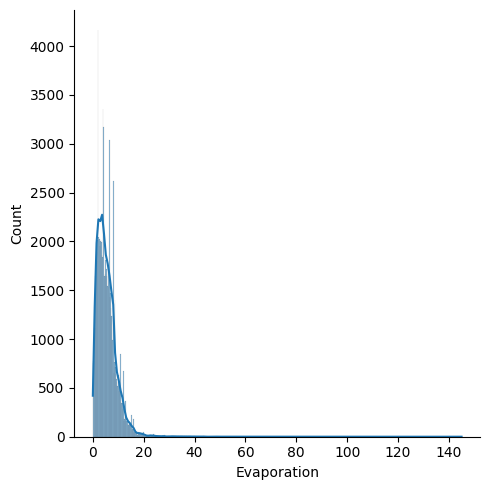

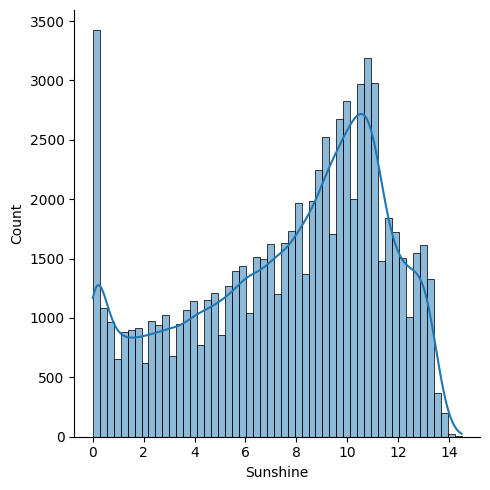

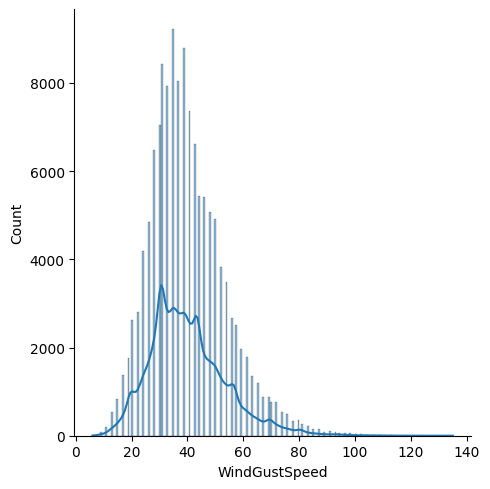

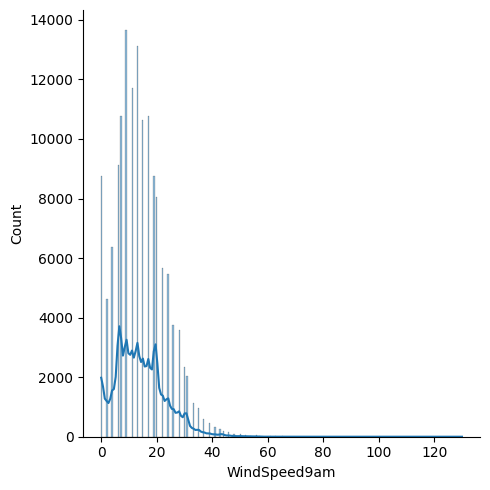

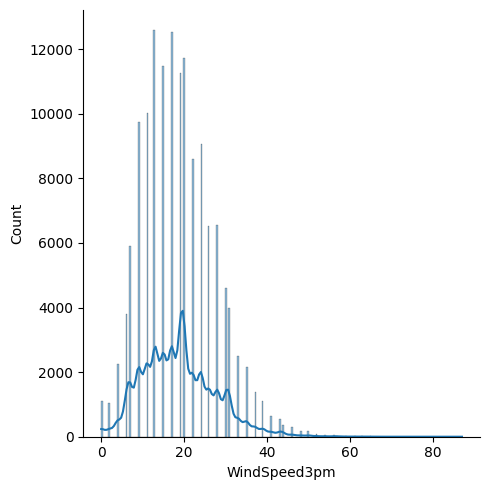

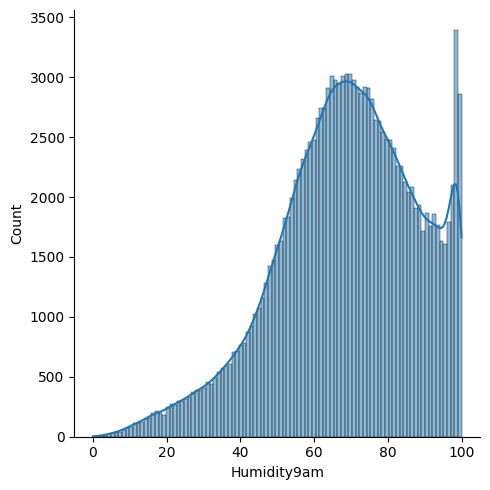

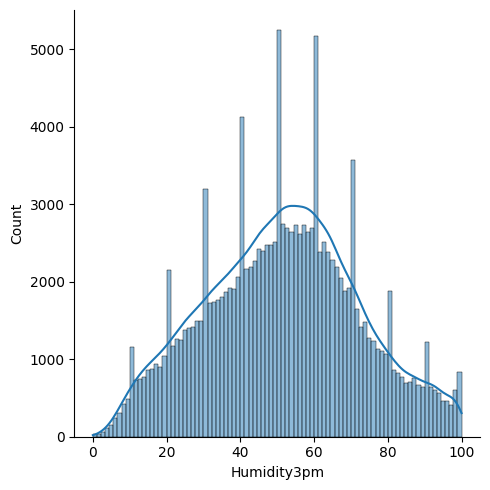

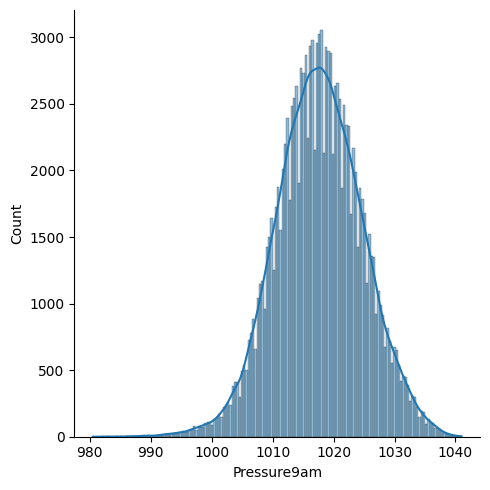

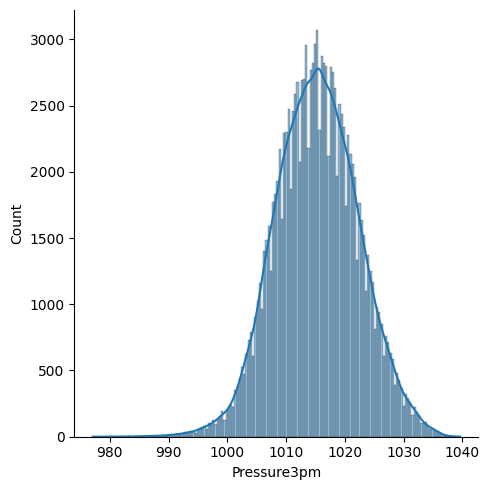

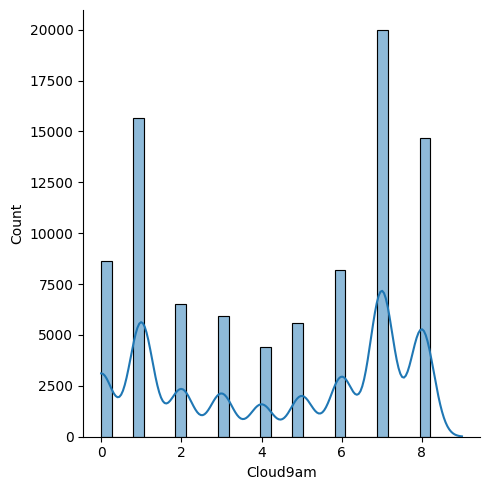

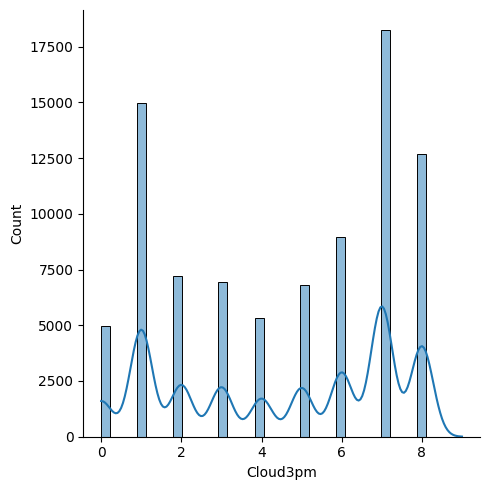

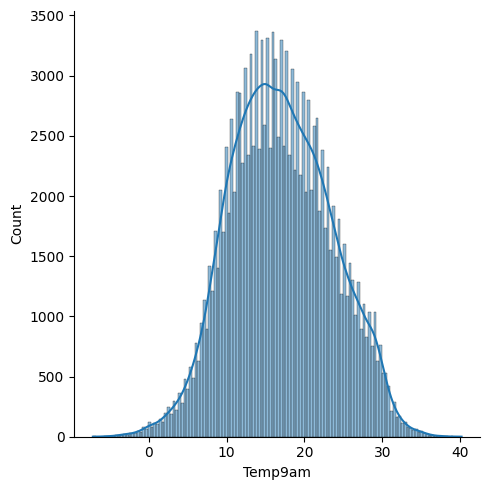

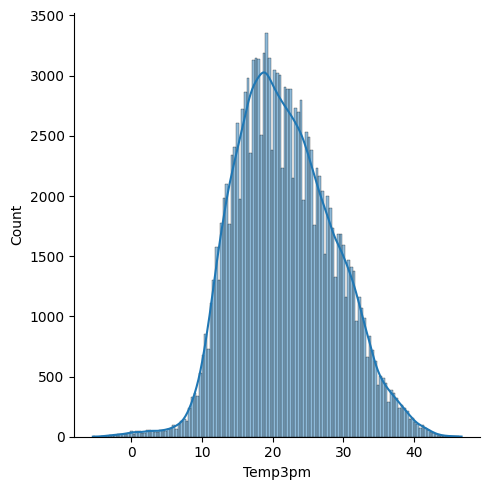

In [53]:
for col in numeric_df.columns:
    plot = sns.displot(df, x = col, kde=True)
    plt.tight_layout()
plt.show()

<Axes: >

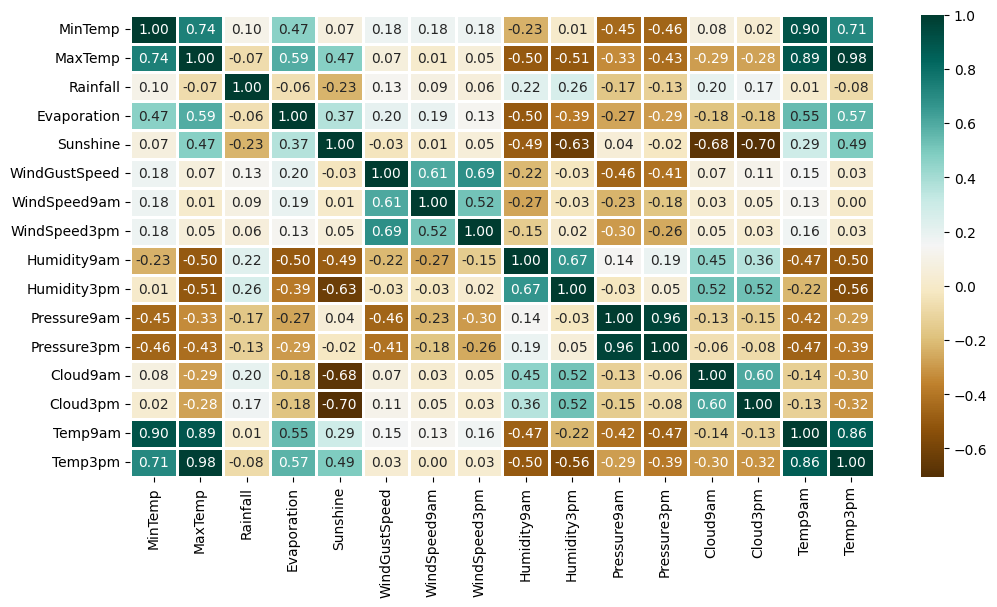

In [54]:
plt.figure(figsize = (12,6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [55]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [56]:
df = df[~df['RainTomorrow'].isnull()]

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from date_transformer import DateCyclicalTransformer
import pandas as pd
import numpy as np

# Assuming df is already defined and contains the necessary columns
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary

# Identify numeric and non-numeric features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
non_numeric_features = X.select_dtypes(include=['object']).drop(['Date'], axis = 1).columns

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

date_transformer = Pipeline(steps=[
    ('date_cyclical_transformer', DateCyclicalTransformer(date_column='Date'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('non_num', non_numeric_transformer, non_numeric_features),
        ('date', date_transformer, ['Date'])
    ]
)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

# Function to evaluate each model
def evaluate_models(model_name, model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_predict = pipeline.predict(X_test)
    
    # Calculate and print the accuracy score
    accuracy = accuracy_score(y_test, y_predict)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

    # Evaluate the model
    print(f"Validation Data Classification Report for {model_name}:")
    print(classification_report(y_test, y_predict))

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_models(model_name, model)
    print("\n" + "*" * 50 + "\n")


Evaluating Logistic Regression...


/Users/phuocdang/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.7907
Validation Data Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     22050
           1       0.52      0.76      0.62      6389

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439


**************************************************

Evaluating Random Forest...
Accuracy for Random Forest: 0.8541
Validation Data Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22050
           1       0.80      0.47      0.59      6389

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.75     28439
weighted avg       0.85      0.85      0.84     28439


**************************************************

Evaluating Gradi

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from date_transformer import DateCyclicalTransformer
import pickle
import numpy as np
import os

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']  # Changed 'auto' to None
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Save the best model
model = random_search.best_estimator_

# Define the directory and path to save the model
models_dir = os.path.join('..', 'models')
os.makedirs(models_dir, exist_ok=True)
model_path = os.path.join(models_dir, 'model.pkl')

# Save the model to a pickle file
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Best model saved to {model_path}")


Best model saved to ../models/model.pkl
